In [1]:
import sys

sys.path.append("../../src")
from main.transporter_dataset import create_dataset
from main.eval import (
    full_test
)
from main.compositions import calculate_aac, calculate_paac
from main.pssm import calculate_pssms_notebook
import matplotlib.pyplot as plt
import seaborn as sns

LOG_FILE = "../../logs/athaliana_amino_sugar_potassium.log"

In [2]:
sodium = ["Q2UVJ5", "O04034", "Q9FKP1", "Q9LJI2", "Q9SYG9", "Q84TI7"]
gdu = ["O81775", "Q9SW07", "Q9FHH5", "Q8S8A0", "Q3E965", "Q3EAV6", "Q3E8L0"]
df_all = create_dataset(
    keywords_substrate_filter=[
        "Amino-acid transport",
        # "Electron transport",
        "Sugar transport",
        "Potassium transport",
    ],
    keywords_component_filter=["Transmembrane"],
    keywords_transport_filter=["Transport"],
    input_file="../../data/raw/swissprot/uniprot-reviewed_yes.tab.gz",
    multi_substrate="integrate",
    outliers=gdu + sodium,
    verbose=True,
    tax_ids_filter=[3702],
    output_log=LOG_FILE,
    sequence_clustering=70,
)


cd-hit: clustered 227 sequences into 167 clusters at threshold 70


# Feature generation

In [3]:
df_aac = calculate_aac(df_all.sequence)
df_paac = calculate_paac(df_all.sequence)
df_pssm = calculate_pssms_notebook(df_all.sequence)
labels = df_all.keywords_transport
labels.value_counts()

Sugar transport         84
Potassium transport     50
Amino-acid transport    33
Name: keywords_transport, dtype: int64

# Eval AAC

############################################################
Feature reduction:  None
############################################################


,0,1,2,3,4,5,6,7,8,9
svc__C,1,1,10,1,10,1,1,10,1,1
svc__class_weight,balanced,balanced,balanced,balanced,balanced,balanced,balanced,balanced,balanced,balanced
svc__decision_function_shape,ovo,ovo,ovo,ovo,ovo,ovo,ovo,ovo,ovo,ovo
svc__gamma,scale,scale,0.01,scale,0.01,scale,scale,scale,scale,scale


F1 score       
dataset                  test  train
label                               
Amino-acid transport    0.784  0.800
Potassium transport     0.933  0.964
Sugar transport         0.892  0.908
mean                    0.870  0.891

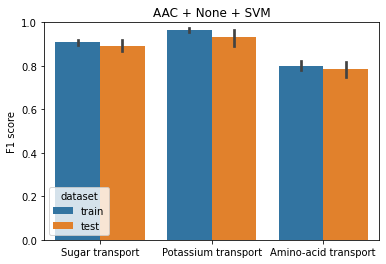

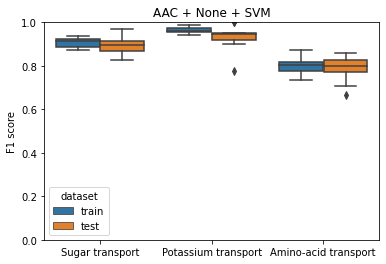

############################################################
Feature reduction:  pca
############################################################


,0,1,2,3,4,5,6,7,8,9
pca__n_components,0.83,0.98,0.99,0.96,0.98,0.8,0.91,0.8,0.9,0.85
svc__C,1,1,1,10,10,1,10,10,1,1
svc__class_weight,balanced,balanced,balanced,None,balanced,balanced,balanced,balanced,balanced,balanced
svc__decision_function_shape,ovo,ovo,ovo,ovo,ovo,ovo,ovo,ovo,ovo,ovo
svc__gamma,scale,0.01,0.01,0.01,0.01,0.1,scale,scale,scale,scale


F1 score       
dataset                  test  train
label                               
Amino-acid transport    0.641  0.812
Potassium transport     0.913  0.955
Sugar transport         0.831  0.914
mean                    0.795  0.894

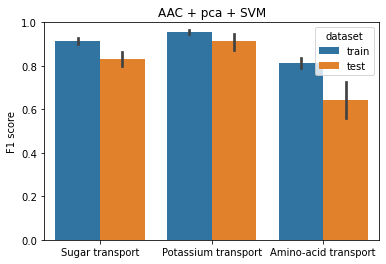

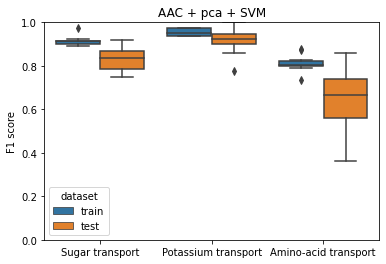

############################################################
Feature reduction:  kbest
############################################################


,0,1,2,3,4,5,6,7,8,9
selectkbest__k,17,7,16,19,8,8,18,19,11,9
svc__C,1,10,10,1,10,1,10,10,1,1
svc__class_weight,balanced,balanced,balanced,balanced,None,balanced,balanced,balanced,balanced,balanced
svc__decision_function_shape,ovo,ovo,ovo,ovo,ovo,ovo,ovo,ovo,ovo,ovo
svc__gamma,scale,0.1,scale,scale,scale,scale,scale,scale,scale,scale


F1 score       
dataset                  test  train
label                               
Amino-acid transport    0.760  0.853
Potassium transport     0.964  0.979
Sugar transport         0.875  0.935
mean                    0.867  0.922

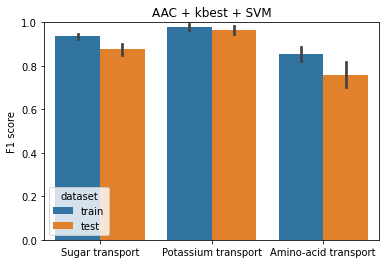

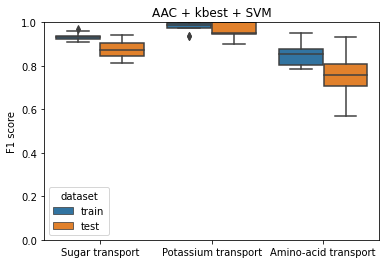

In [4]:
for dim_reduction in [None, "pca", "kbest"]:
    print("#"*60)
    print("Feature reduction: ", dim_reduction)
    print("#"*60)
    df_scores, df_params = full_test(df_aac, labels, kernel="rbf", dim_reduction=dim_reduction)

    display(df_params)
    df_scores_piv = df_scores.groupby(["label", "dataset"]).mean().unstack(1)
    df_scores_piv.loc["mean"] = df_scores_piv.mean()
    display(df_scores_piv.round(3))

    g = sns.barplot(data=df_scores, y="F1 score", x="label", hue="dataset")
    g.set_ylim((0,1))
    g.set_xlabel("")
    g.set_title(f"AAC + {dim_reduction} + SVM")
    plt.show()

    g = sns.boxplot(data=df_scores, y="F1 score", x="label", hue="dataset")
    g.set_xlabel("")
    g.set_ylim((0,1))
    g.set_title(f"AAC + {dim_reduction} + SVM")
    plt.show()

# Eval PAAC

############################################################
Feature reduction:  None
############################################################


,0,1,2,3,4,5,6,7,8,9
svc__C,1,1,1,1,1,1,1,1,10,1
svc__class_weight,balanced,balanced,balanced,balanced,balanced,balanced,balanced,balanced,balanced,balanced
svc__decision_function_shape,ovo,ovo,ovo,ovo,ovo,ovo,ovo,ovo,ovo,ovo
svc__gamma,scale,scale,scale,scale,scale,scale,scale,scale,scale,scale


F1 score       
dataset                  test  train
label                               
Amino-acid transport    0.632  0.607
Potassium transport     0.909  0.936
Sugar transport         0.874  0.886
mean                    0.805  0.810

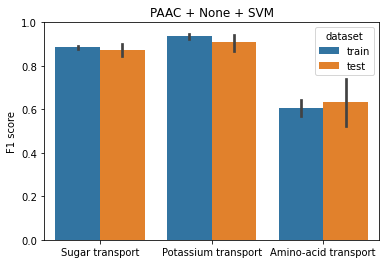

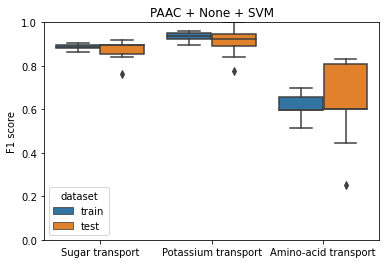

############################################################
Feature reduction:  pca
############################################################


,0,1,2,3,4,5,6,7,8,9
pca__n_components,0.99,0.99,0.99,0.99,0.99,0.99,0.99,0.99,0.99,0.99
svc__C,1,1,1,1,1,1,1,1,1,1
svc__class_weight,balanced,balanced,balanced,balanced,balanced,balanced,balanced,balanced,balanced,balanced
svc__decision_function_shape,ovo,ovo,ovo,ovo,ovo,ovo,ovo,ovo,ovo,ovo
svc__gamma,scale,scale,scale,scale,scale,scale,scale,scale,scale,scale


F1 score       
dataset                  test  train
label                               
Amino-acid transport    0.558  0.641
Potassium transport     0.842  0.868
Sugar transport         0.853  0.891
mean                    0.751  0.800

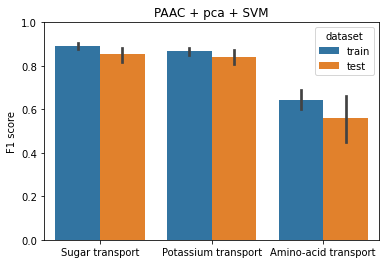

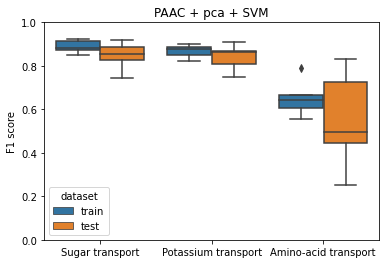

############################################################
Feature reduction:  kbest
############################################################


,0,1,2,3,4,5,6,7,8,9
selectkbest__k,62,202,72,305,60,127,78,85,61,53
svc__C,10,1,1,1,1,1,10,10,1,1
svc__class_weight,balanced,balanced,balanced,balanced,balanced,balanced,balanced,balanced,balanced,balanced
svc__decision_function_shape,ovo,ovo,ovo,ovo,ovo,ovo,ovo,ovo,ovo,ovo
svc__gamma,0.01,scale,0.01,scale,0.01,scale,0.01,0.01,scale,scale


F1 score       
dataset                  test  train
label                               
Amino-acid transport    0.714  0.819
Potassium transport     0.887  0.954
Sugar transport         0.861  0.930
mean                    0.821  0.901

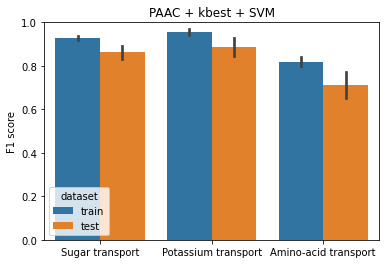

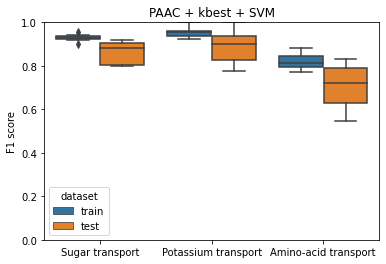

In [5]:
for dim_reduction in [None, "pca", "kbest"]:
    print("#"*60)
    print("Feature reduction: ", dim_reduction)
    print("#"*60)
    df_scores, df_params = full_test(df_paac, labels, kernel="rbf", dim_reduction=dim_reduction)

    display(df_params)
    df_scores_piv = df_scores.groupby(["label", "dataset"]).mean().unstack(1)
    df_scores_piv.loc["mean"] = df_scores_piv.mean()
    display(df_scores_piv.round(3))

    g = sns.barplot(data=df_scores, y="F1 score", x="label", hue="dataset")
    g.set_ylim((0,1))
    g.set_xlabel("")
    g.set_title(f"PAAC + {dim_reduction} + SVM")
    plt.show()

    g = sns.boxplot(data=df_scores, y="F1 score", x="label", hue="dataset")
    g.set_xlabel("")
    g.set_ylim((0,1))
    g.set_title(f"PAAC + {dim_reduction} + SVM")
    plt.show()

# PSSM

############################################################
Feature reduction:  None
############################################################


,0,1,2,3,4,5,6,7,8,9
pssmselector__iterations,1,1,1,1,1,1,1,1,1,1
pssmselector__uniref_threshold,50,50,50,50,50,50,50,50,50,50
svc__C,10,1,10,10,10,10,10,10,10,10
svc__class_weight,balanced,balanced,balanced,balanced,balanced,balanced,balanced,balanced,balanced,balanced
svc__decision_function_shape,ovo,ovo,ovo,ovo,ovo,ovo,ovo,ovo,ovo,ovo
svc__gamma,scale,scale,scale,scale,scale,scale,scale,scale,scale,scale


F1 score       
dataset                  test  train
label                               
Amino-acid transport    0.919  0.907
Potassium transport     0.978  0.983
Sugar transport         0.961  0.958
mean                    0.953  0.950

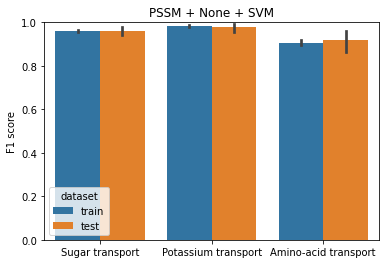

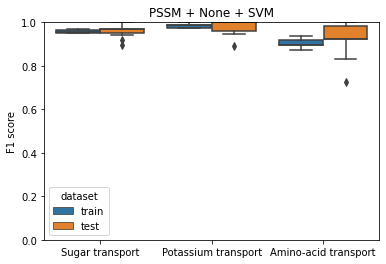

############################################################
Feature reduction:  kbest
############################################################


,0,1,2,3,4,5,6,7,8,9
pssmselector__iterations,1,1,1,1,1,1,1,1,1,1
pssmselector__uniref_threshold,50,50,50,50,50,50,50,50,50,50
selectkbest__k,961,191,791,71,161,531,531,1381,91,81
svc__C,10,10,10,10,1,10,10,10,10,10
svc__class_weight,balanced,balanced,balanced,balanced,balanced,balanced,balanced,balanced,balanced,balanced
svc__decision_function_shape,ovo,ovo,ovo,ovo,ovo,ovo,ovo,ovo,ovo,ovo
svc__gamma,scale,scale,scale,0.01,0.01,scale,scale,scale,0.01,0.01


F1 score       
dataset                  test  train
label                               
Amino-acid transport    0.914  0.937
Potassium transport     0.973  0.997
Sugar transport         0.955  0.976
mean                    0.947  0.970

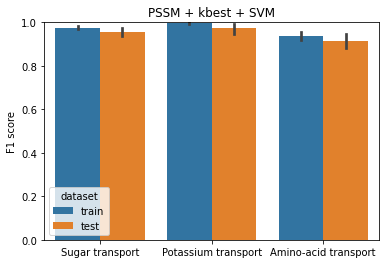

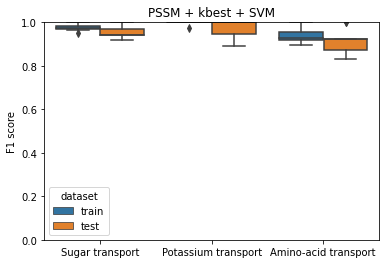

In [6]:
for dim_reduction in [None, "kbest"]:
    print("#" * 60)
    print("Feature reduction: ", dim_reduction)
    print("#" * 60)
    df_scores, df_params = full_test(
        df_pssm,
        labels,
        kernel="rbf",
        dim_reduction=dim_reduction,
        feature_filter="pssm",
        select_k_steps=10,
    )

    display(df_params)
    df_scores_piv = df_scores.groupby(["label", "dataset"]).mean().unstack(1)
    df_scores_piv.loc["mean"] = df_scores_piv.mean()
    display(df_scores_piv.round(3))

    g = sns.barplot(data=df_scores, y="F1 score", x="label", hue="dataset")
    g.set_ylim((0, 1))
    g.set_xlabel("")
    g.set_title(f"PSSM + {dim_reduction} + SVM")
    plt.show()

    g = sns.boxplot(data=df_scores, y="F1 score", x="label", hue="dataset")
    g.set_xlabel("")
    g.set_ylim((0, 1))
    g.set_title(f"PSSM + {dim_reduction} + SVM")
    plt.show()
